Task 3 : Exploratory Data Analysis Retail

Perform Exploratory Data Analysis on the dataset "SampleSuperstore"

In [94]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [97]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Data Cleaning

In [98]:
#cheking for nul values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [99]:
#checking for duplicate values
df.duplicated().sum()

17

In [100]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [101]:
#checking for the unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [102]:
#dropping the unnecessary columns
df.drop(['Postal Code'], axis=1, inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Data Visualization

Category vs Sub Category 

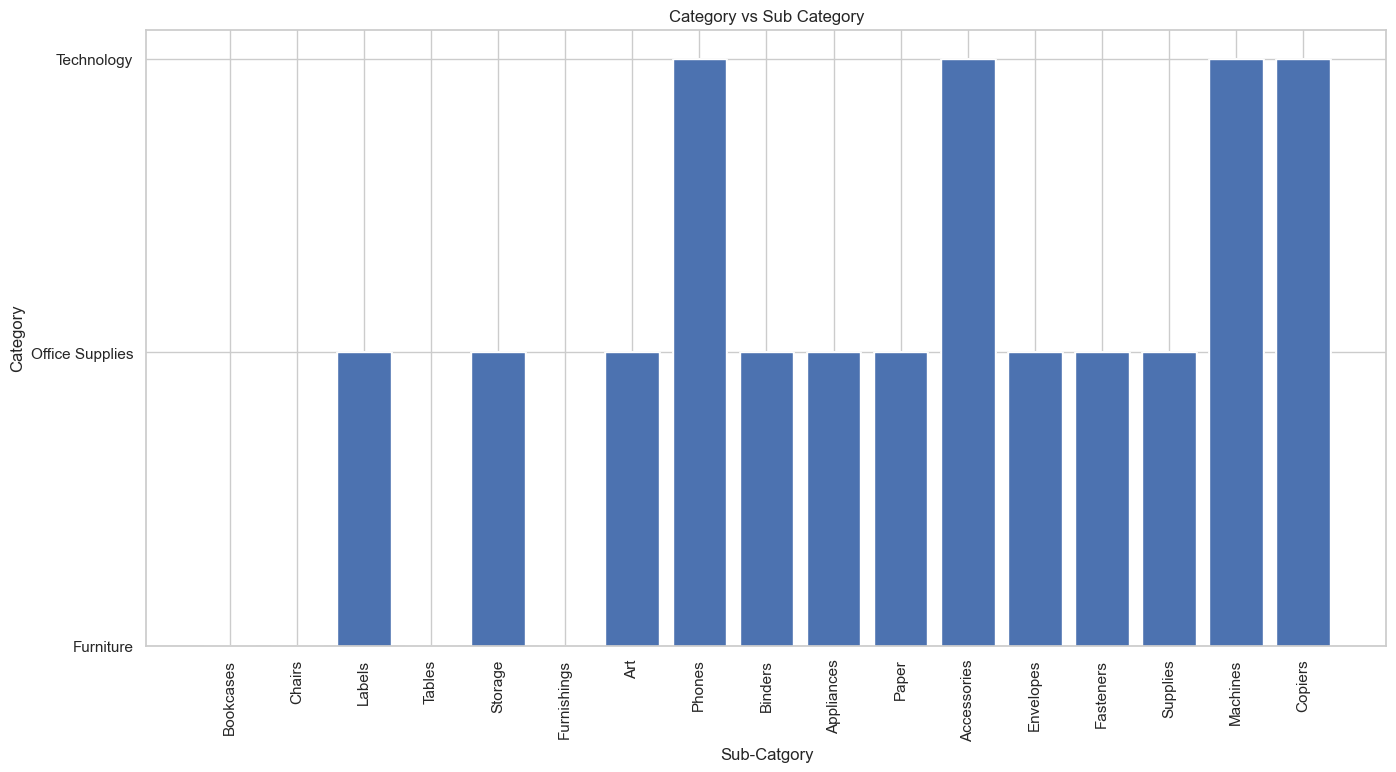

In [103]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=df)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.show()

Visualizing numerical columns

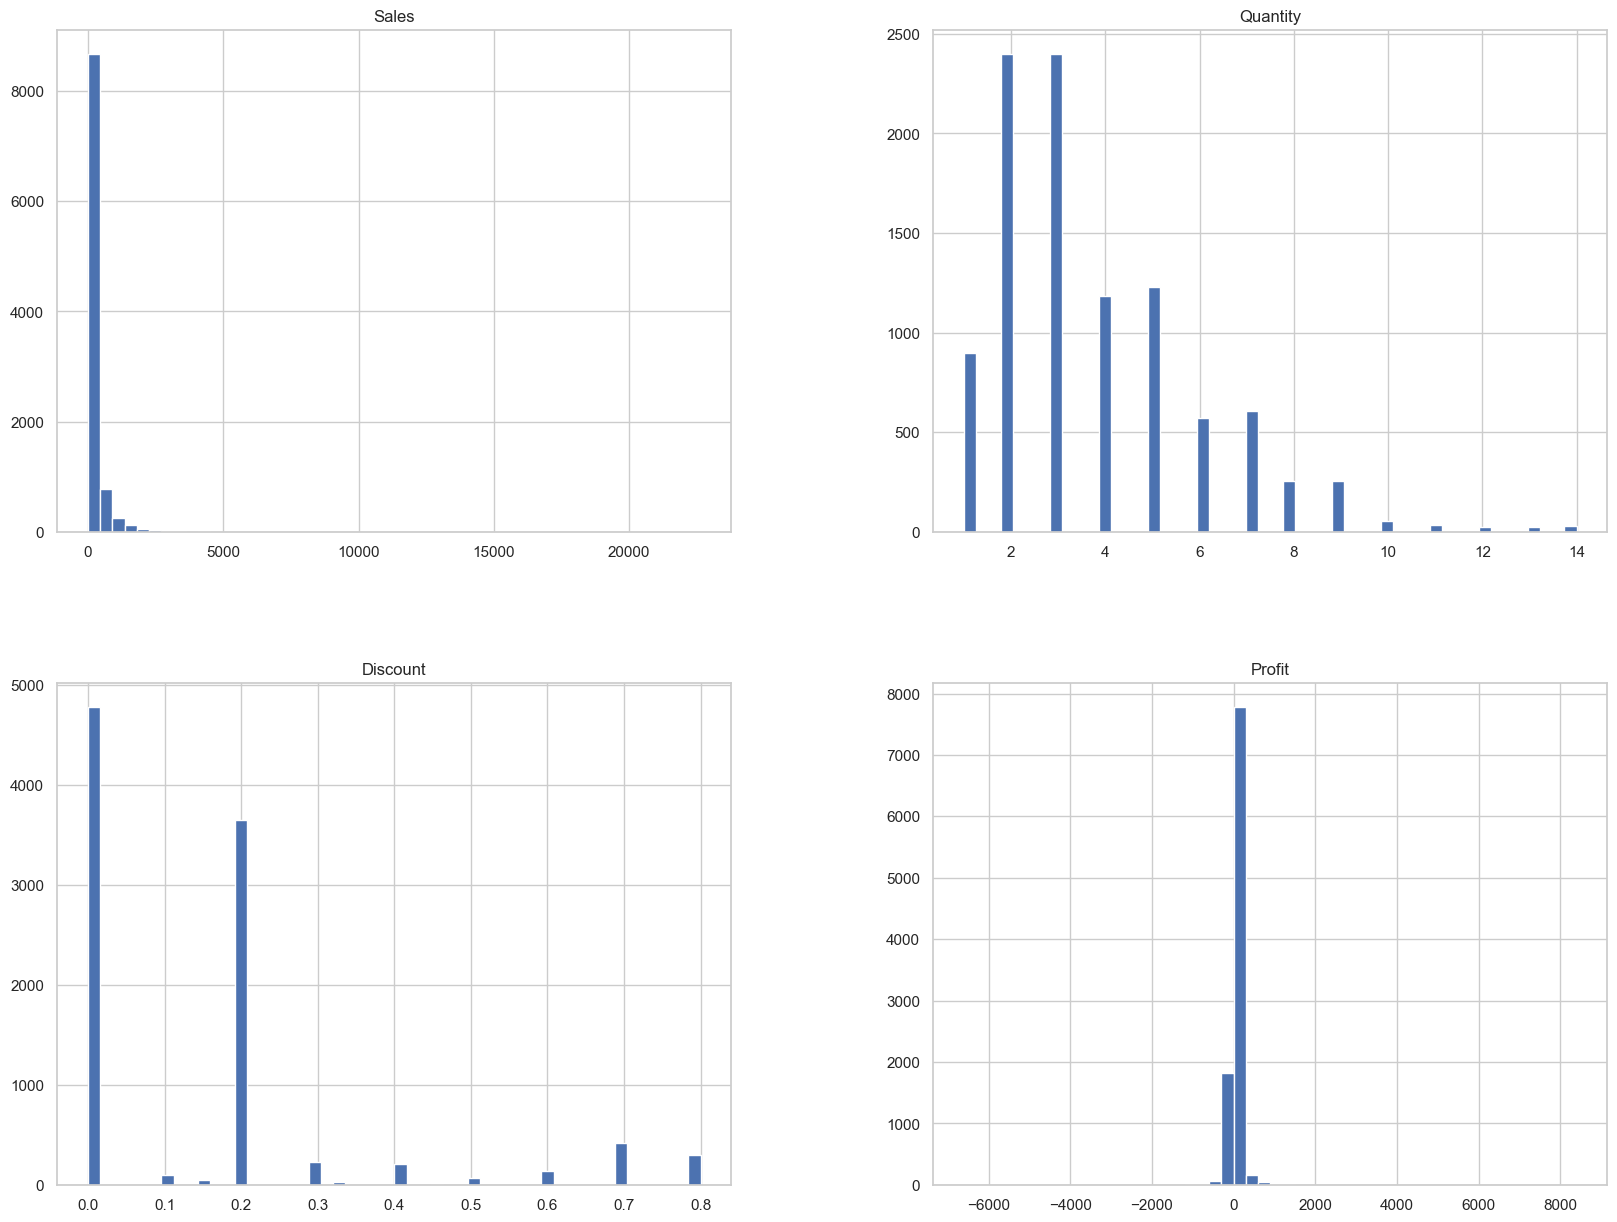

In [104]:
df.hist(bins=50 ,figsize=(20,15))
plt.show()

In [105]:
df['State'].value_counts()

State
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

Visualizing each state salles

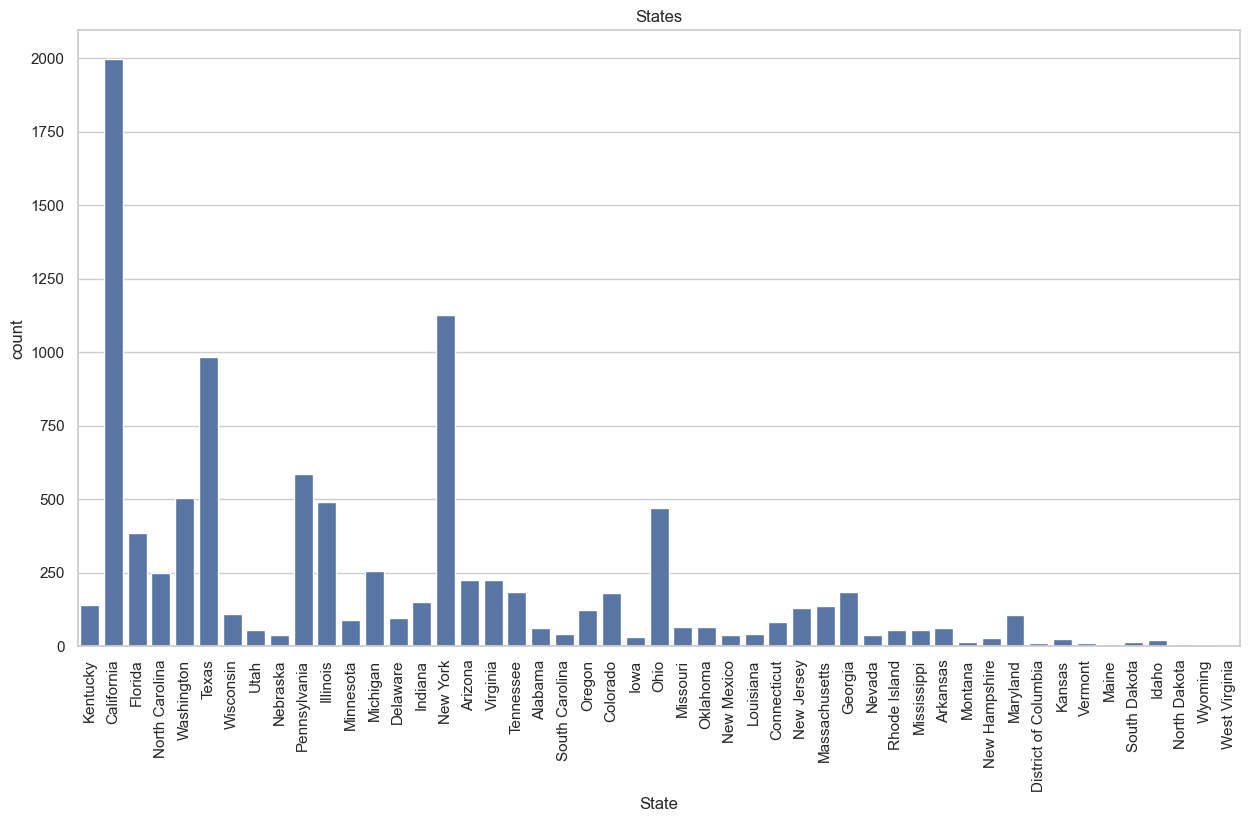

In [106]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title('States')
plt.show()

Plotting the profit and loss for each subcategory

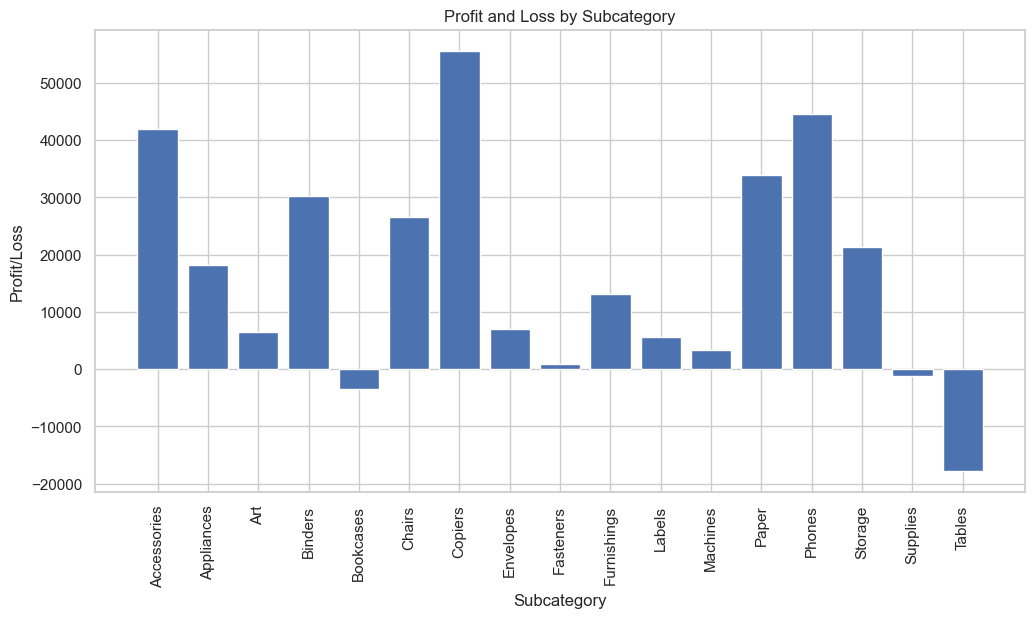

In [107]:
plt.figure(figsize=(12, 6))
plt.bar(profit_loss_by_subcategory.index, profit_loss_by_subcategory.values)
plt.title('Profit and Loss by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=90)
plt.show()

Pie Consumption Patterns in the United States

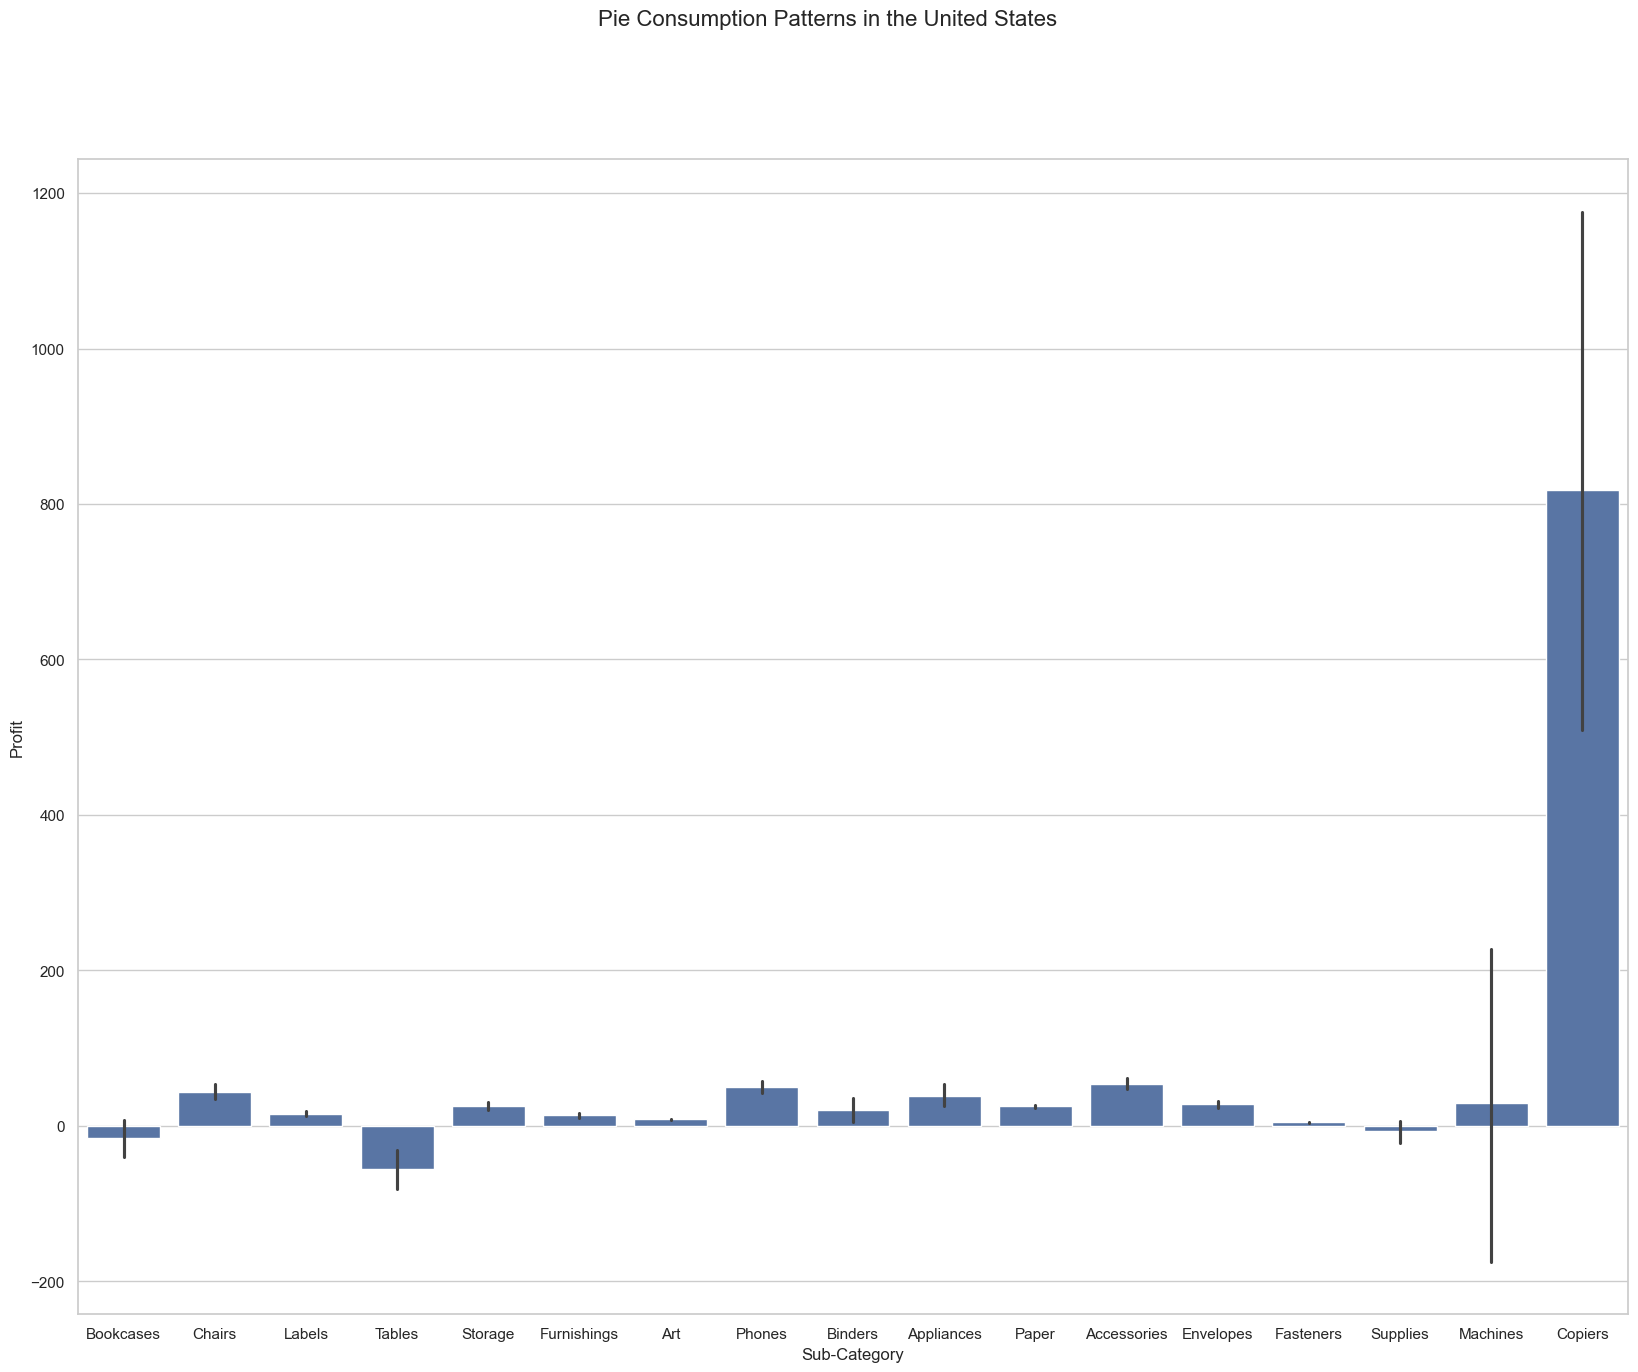

In [115]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))
sns.barplot(x='Sub-Category',y='Profit', data=df)
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

Ship Mode by Category

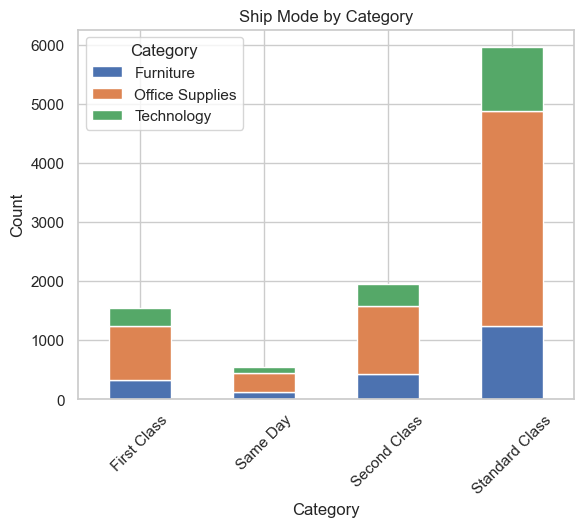

In [109]:
category_by_ship_mode = df.groupby(['Ship Mode','Category']).size().unstack()
category_by_ship_mode.plot(kind='bar', stacked=True)

plt.title('Ship Mode by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

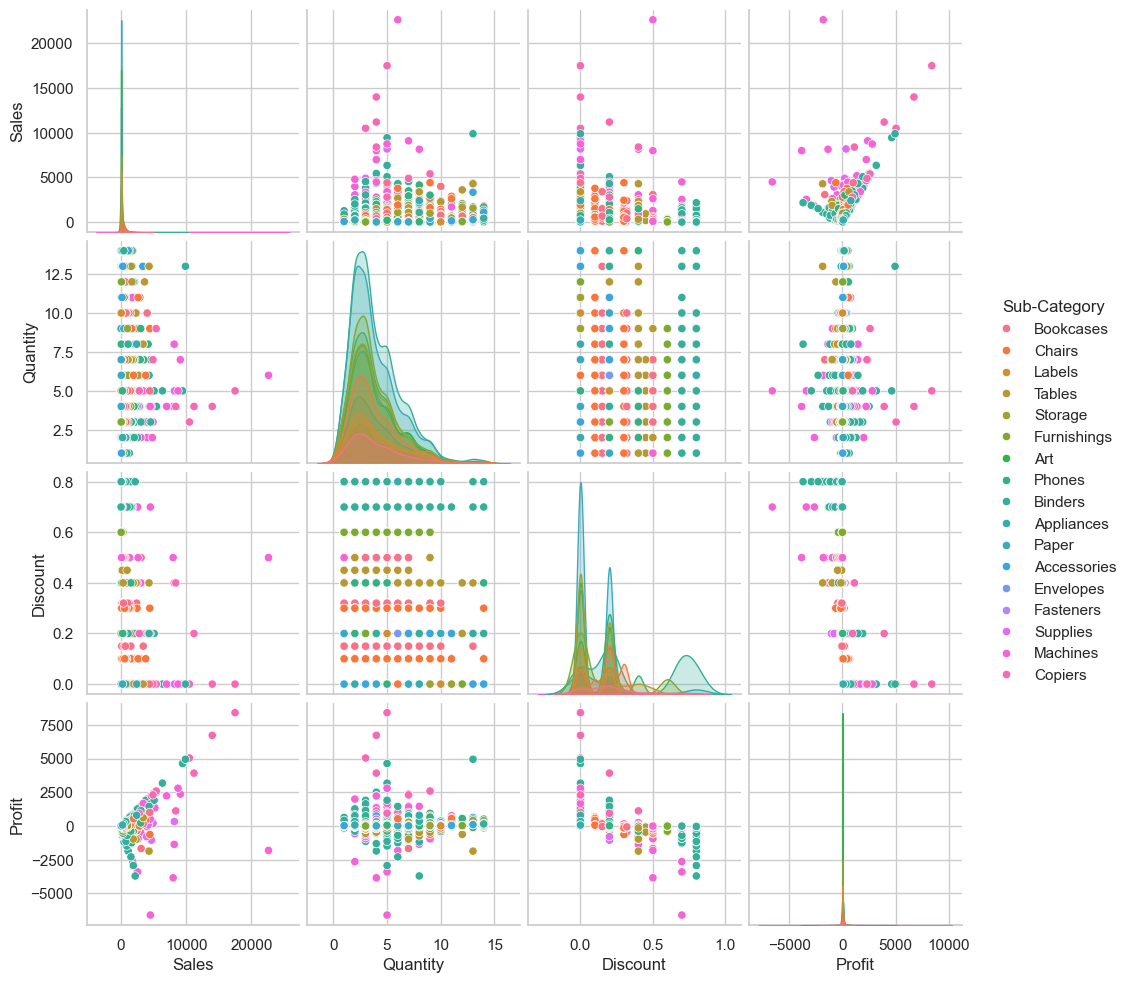

In [110]:
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')
plt.show()

Sales by Segment and Sub-Category in USA

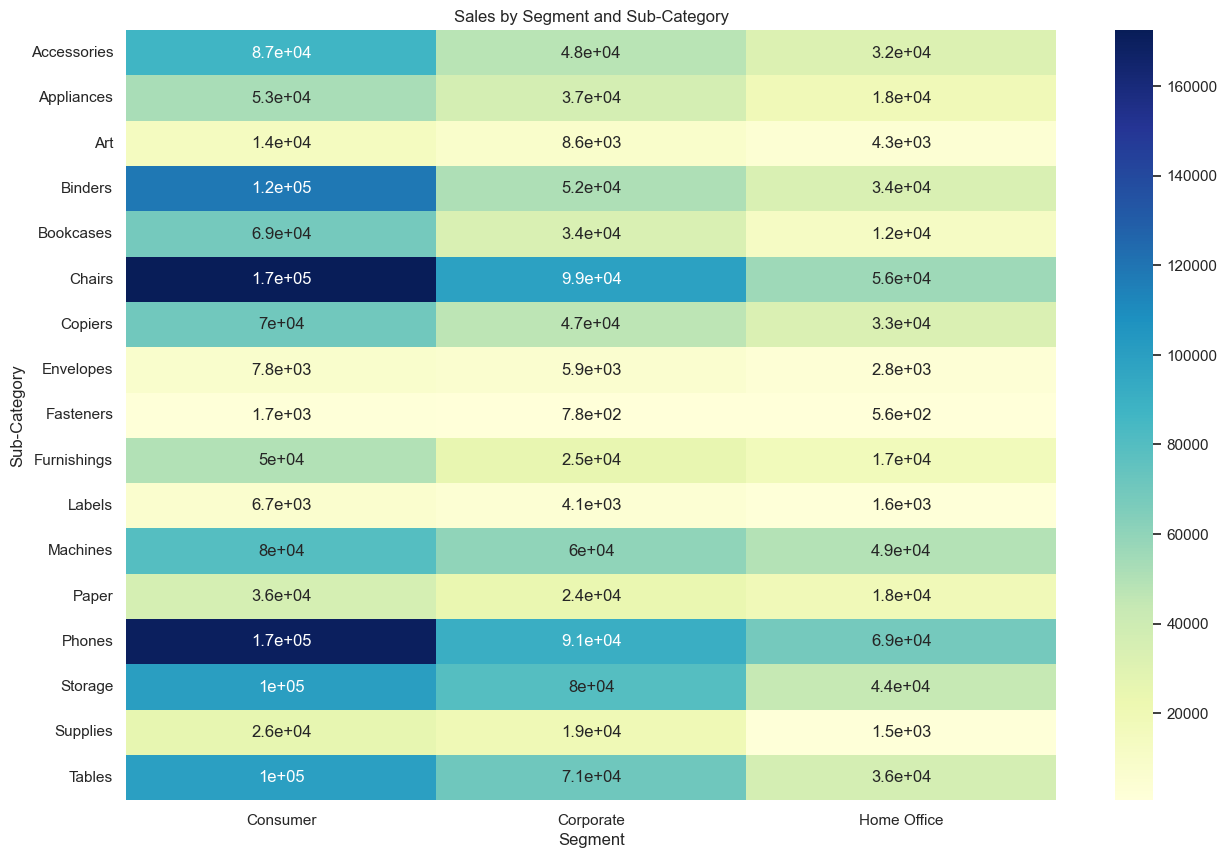

In [111]:
# Filter the dataframe for United States
df_us = df[df['Country'] == 'United States']

# Group the data by Segment and Sub-Category and calculate the sum of Sales
sales_by_segment_subcategory = df_us.groupby(['Segment', 'Sub-Category'])['Sales'].sum().reset_index()

# Pivot the data to have Segment as columns and Sub-Category as rows
sales_pivot = sales_by_segment_subcategory.pivot(index='Sub-Category', columns='Segment', values='Sales')

# Plot the data
plt.figure(figsize=(15, 10))
sns.heatmap(sales_pivot, annot=True, cmap='YlGnBu')
plt.title('Sales by Segment and Sub-Category')
plt.xlabel('Segment')
plt.ylabel('Sub-Category')
plt.show()

discounts by Segment and Sub-Category

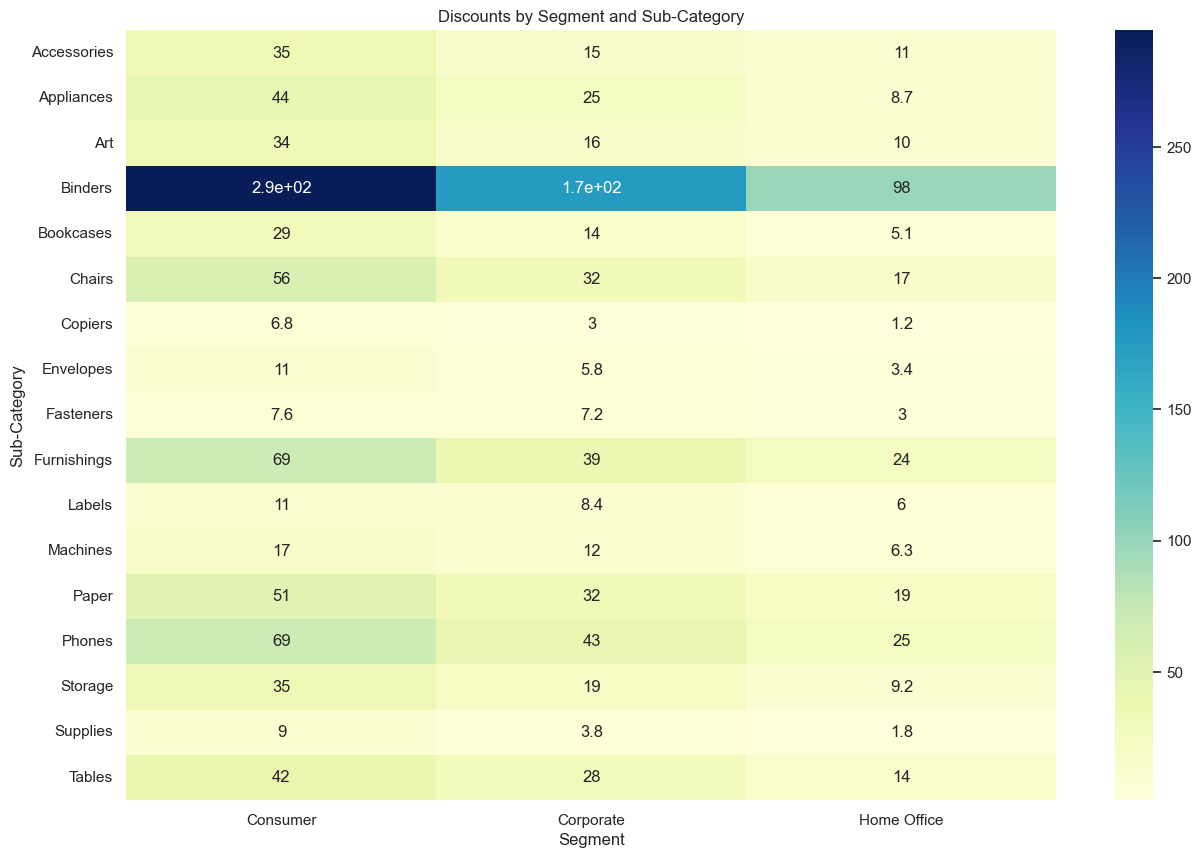

In [116]:
# Filter the dataframe for United States
df_us = df[df['Country'] == 'United States']

# Group the data by Segment and Sub-Category and calculate the sum of Sales
sales_by_segment_subcategory = df_us.groupby(['Segment', 'Sub-Category'])['Discount'].sum().reset_index()

# Pivot the data to have Segment as columns and Sub-Category as rows
sales_pivot = sales_by_segment_subcategory.pivot(index='Sub-Category', columns='Segment', values='Discount')

# Plot the data
plt.figure(figsize=(15, 10))
sns.heatmap(sales_pivot, annot=True, cmap='YlGnBu')
plt.title('Discounts by Segment and Sub-Category')
plt.xlabel('Segment')
plt.ylabel('Sub-Category')
plt.show()

Sales by Region and Sub-Category

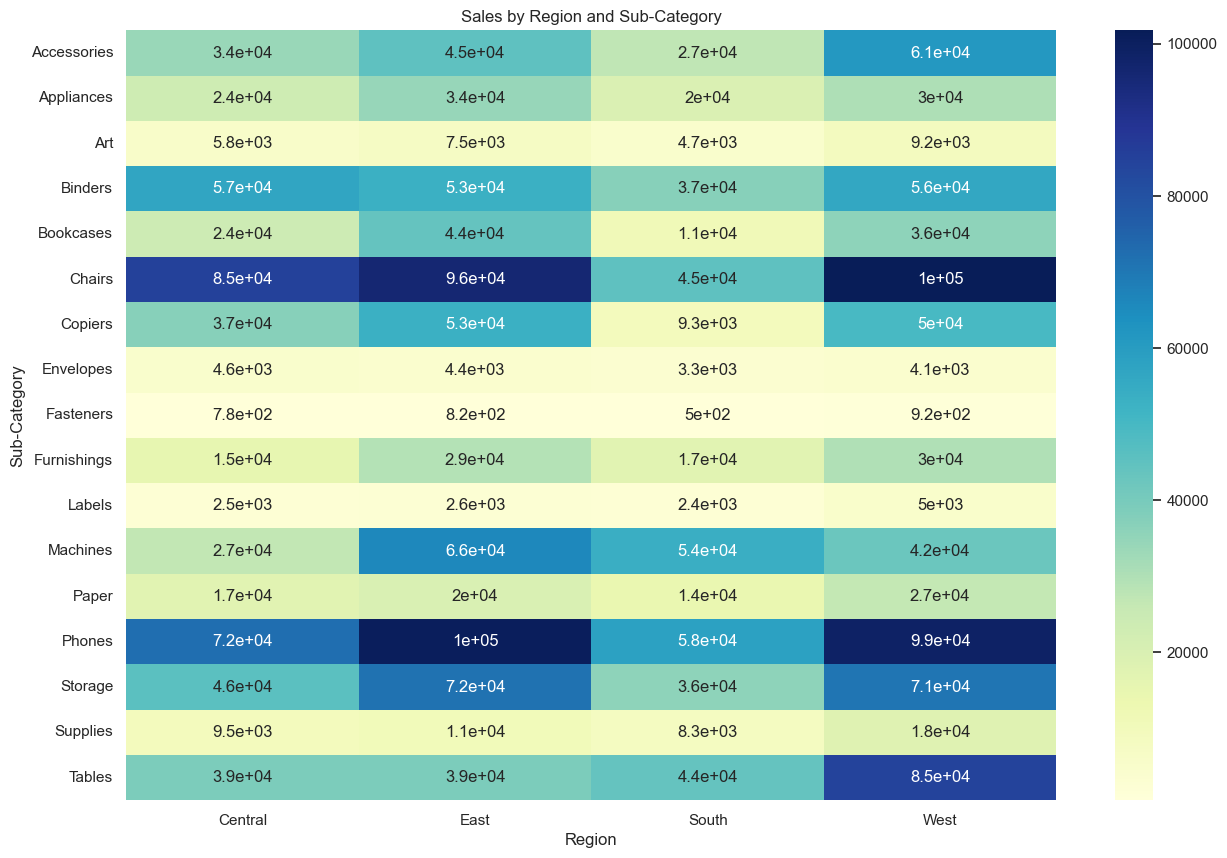

In [117]:
# Filter the dataframe for United States
df_us = df[df['Country'] == 'United States']

# Group the data by Segment and Sub-Category and calculate the sum of Sales
sales_by_segment_subcategory = df_us.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

# Pivot the data to have Segment as columns and Sub-Category as rows
sales_pivot = sales_by_segment_subcategory.pivot(index='Sub-Category', columns='Region', values='Sales')

# Plot the data
plt.figure(figsize=(15, 10))
sns.heatmap(sales_pivot, annot=True, cmap='YlGnBu')
plt.title('Sales by Region and Sub-Category')
plt.xlabel('Region')
plt.ylabel('Sub-Category')
plt.show()

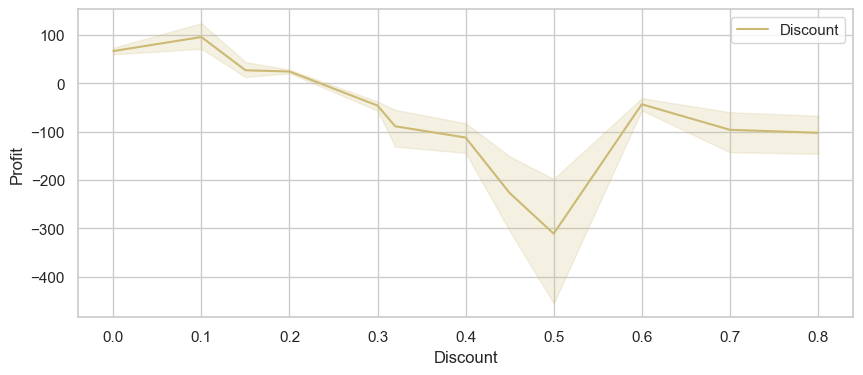

In [114]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount', y='Profit', data=df, color='y', label='Discount')
plt.legend()
plt.show()